# Logistic Regression : Stock Market Data

In [68]:
#Importing all libraries
%matplotlib inline 
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [14]:
#Load data
path=os.getcwd()
smarket=pd.read_csv(path+'/datasets/Smarket.csv',index_col=0)
smarket.head(5)
#Here we see Direction column can be used as the classification label/response

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


EDA on data

In [15]:
#dimensions of the dataset
smarket.shape

(1250, 9)

In [17]:
#summary of the data. We use describe to generate descriptive statistics.
smarket.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,648
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,NaN
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,NaN
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,NaN
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,NaN
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,NaN
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,NaN


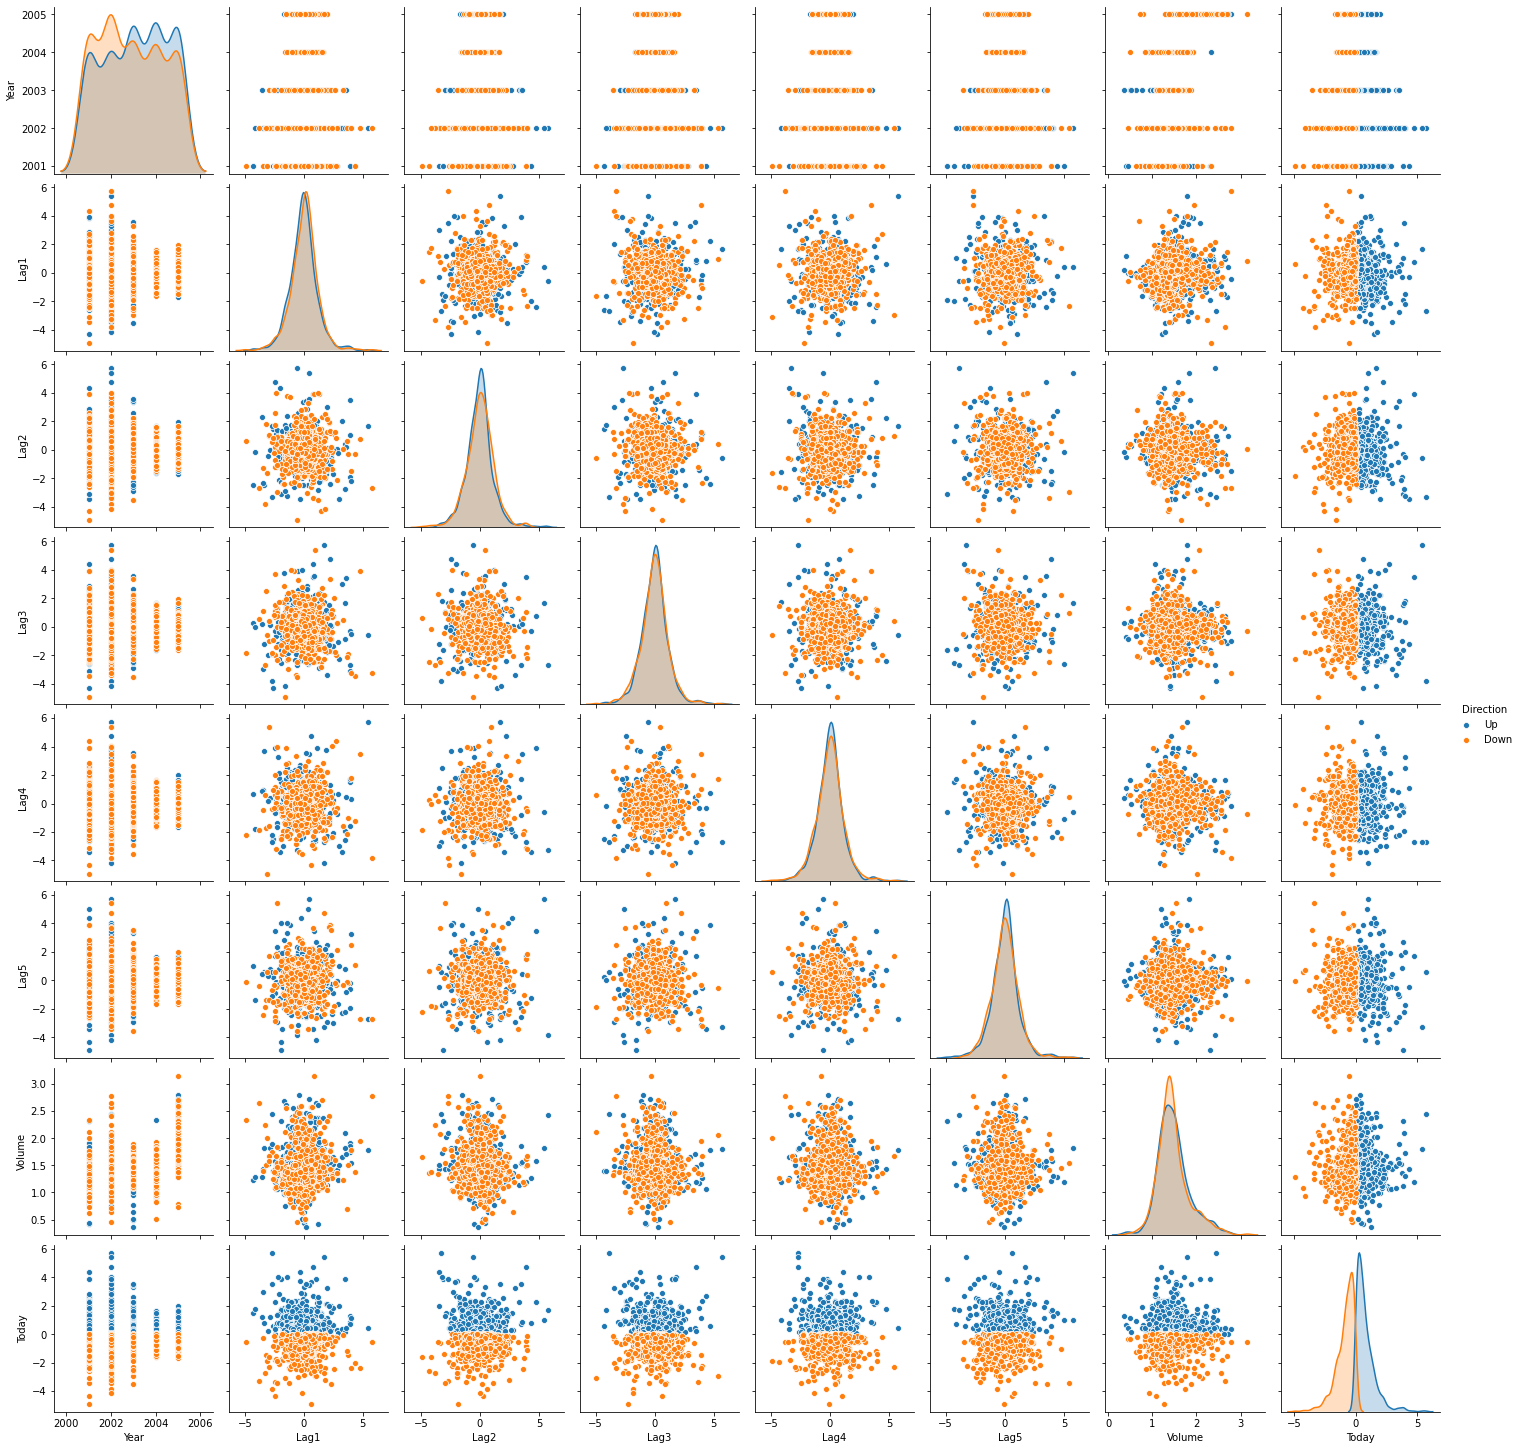

In [22]:
#finding correlation between attributes
sns.pairplot(smarket,hue='Direction')

In [25]:
#finding pairwise correlation.Since we are finding pairwise correlation here, only quantitative attributes are used
smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


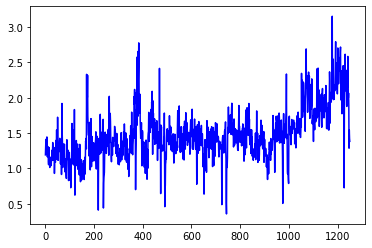

In [31]:
#plot the Volume attribute
plt.plot(smarket.Volume,color='blue')

We notice the upward trend in volume

We will now build a logistic regression model & train it using our training dataset

In [32]:
# separate training and test sets
train_data = smarket.loc[smarket.Year<2005]
test_date = smarket.loc[smarket.Year>=2005]

In [33]:
X_train= train_data.loc[:,'Lag1':'Volume']
y_train= train_data.Direction

X_test=test_date.loc[:,'Lag1':'Volume']
y_test=test_date.Direction

In [37]:
#Building the logistic regression model and training it using train_data
glm_model=LogisticRegression()
glm_fit=glm_model.fit(X_train,y_train)

In [63]:
#Prediction
y_pred=glm_fit.predict(X_test)

In [50]:
#confusion matrix
labels=['Up','Down']
conf_m = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_m.columns.name = 'Predicted'
conf_m.index.name = 'True'
conf_m

Predicted,0,1
True,,
0,74,37
1,93,48


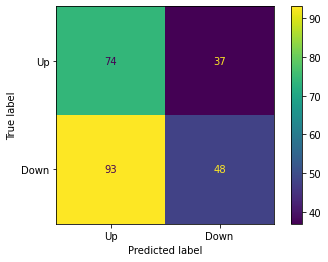

In [61]:
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                            display_labels=labels)
disp.plot()

In [62]:
#Accuracy & classification test error of the model using test data
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print('Test Error: ' + str(1 - accuracy_score(y_test, y_pred)))

Accuracy: 0.48412698412698413
Test Error: 0.5158730158730158


In [67]:
#Classification Report
print(classification_report(y_test,y_pred,target_names=labels))

              precision    recall  f1-score   support

          Up       0.44      0.67      0.53       111
        Down       0.56      0.34      0.42       141

    accuracy                           0.48       252
   macro avg       0.50      0.50      0.48       252
weighted avg       0.51      0.48      0.47       252



# Multiclass Classification using MNIST data